In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')

%matplotlib inline

import seaborn as sns

### 1.Data Load 

기존 파일 인코딩 'CP949' -> 'UTF-8' 변경하여 data read

In [2]:
df = pd.read_csv('DFE_project_data_raw.csv', sep = ',', encoding = 'UTF-8')

In [3]:
df.head()

,회사이름,회사코드,리뷰코드,직종구분,재직상태,근무지역,등록일자,별점평가,승진기회,복지급여,워라밸,사내문화,경영진,기업장점,기업단점,바라는점,성장예상,추천여부
0,삼성전자(주),30139,1084668,경영/기획/컨설팅,전직원,해외,2019-04-18,80,80,80,60,60,80,연봉과 복리후생이 매우 좋으며 열심히 하면(운도 필요하지만) 기회가 주어지는 곳. ...,"조직이 방대하여 의사결정이 느리고 소통이 잘 되지 않음. 보신주의, 상명하복, 줄서...",단기 성과주의를 경계해야 함. 최고경영진은 장기비전과 미래를 고민하나 적지 않은 수...,비슷,이 기업을 추천 합니다!
1,삼성전자(주),30139,1084223,생산관리/품질관리,전직원,경기,2019-04-18,80,60,100,80,80,80,글로벌 1위기업답게 체계적인 시스템으로 돌아가는 조직문화와 업무진행,굉장히 전문적이라서 본인의 업무외엔 전혀 모름다양하게 배우기는 어려움,다양한 조직문화 활동으로 많이 좋아지고 있지만아직도 갑질 문화가 남아있다. 근절이 필요!,성장,이 기업을 추천 합니다!
2,삼성전자(주),30139,1083148,인사/총무,전직원,경기,2019-04-17,80,20,100,100,80,80,"아침 점심 저녁 다 제공, 셔틀버스도 운영되고 근무환경 좋음급여가 하는일에 비해 많음",사업부 내에 자주 조직이 변경되어 맡는 팀들이 자주 바뀜,파견직에서 업무평가로 계약직 정규직 전환 기회부여되었음 좋겠자,성장,이 기업을 추천 합니다!
3,삼성전자(주),30139,1082388,마케팅/시장조사,현직원,경기,2019-04-17,80,60,100,100,60,60,복지에 있어서 혜택을 볼 수 있는 것이 많다.\r업무 분업화가 잘되어 있어 자신의 ...,"부서별로 워라밸이 굉장히 다르다 (특히, 개발직군은 최악)\r업무 분업화가 너무 되...","직원들의 불만을 지속적으로 취합하고 있으면, 그에 대한 회사 차원에서의 대응이 실질...",비슷,이 기업을 추천 합니다!
4,삼성전자(주),30139,1081430,생산/제조,전직원,경기,2019-04-17,60,60,100,40,60,60,"야근수당을 챙겨준다. 밥을 잘 먹을 수 있다. 월차, 연차를 쓰지 못하면 다른 방법...","단순 업무의 반복, 근무시간이 길어질 때가 있어 육체적으로 피로하다. 워라벨을 포기...",합리적인 복지 및 보상 체계를 마련해주고 직원들의 이야기를 잘 들어주었으면 좋겠다.,성장,이 기업을 추천 합니다!


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563922 entries, 0 to 563921
Data columns (total 18 columns):
회사이름    563922 non-null object
회사코드    563922 non-null int64
리뷰코드    563922 non-null int64
직종구분    563922 non-null object
재직상태    563922 non-null object
근무지역    563922 non-null object
등록일자    563922 non-null object
별점평가    563922 non-null int64
승진기회    563922 non-null int64
복지급여    563922 non-null int64
워라밸     563922 non-null int64
사내문화    563922 non-null int64
경영진     563922 non-null int64
기업장점    563922 non-null object
기업단점    563920 non-null object
바라는점    563407 non-null object
성장예상    404582 non-null object
추천여부    563922 non-null object
dtypes: int64(8), object(10)
memory usage: 77.4+ MB


In [5]:
df.isnull().sum()

회사이름         0
회사코드         0
리뷰코드         0
직종구분         0
재직상태         0
근무지역         0
등록일자         0
별점평가         0
승진기회         0
복지급여         0
워라밸          0
사내문화         0
경영진          0
기업장점         0
기업단점         2
바라는점       515
성장예상    159340
추천여부         0
dtype: int64

- 추천여부 : binary 칼럼 전환 

In [6]:
def clean(x):
    x = x.replace("이 기업을 추천 합니다!", "1").replace("이 기업을 추천하지 않습니다.", "0")
    return float(x)

In [7]:
df['recom_tf'] = df['추천여부'].apply(clean)

In [27]:
df_sub = df[['회사코드', '리뷰코드', '별점평가', '승진기회', '복지급여', '워라밸', '사내문화', '경영진','recom_tf']]

In [28]:
df_sub.head()

,회사코드,리뷰코드,별점평가,승진기회,복지급여,워라밸,사내문화,경영진,recom_tf
0,30139,1084668,80,80,80,60,60,80,1.0
1,30139,1084223,80,60,100,80,80,80,1.0
2,30139,1083148,80,20,100,100,80,80,1.0
3,30139,1082388,80,60,100,100,60,60,1.0
4,30139,1081430,60,60,100,40,60,60,1.0


In [29]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563922 entries, 0 to 563921
Data columns (total 9 columns):
회사코드        563922 non-null int64
리뷰코드        563922 non-null int64
별점평가        563922 non-null int64
승진기회        563922 non-null int64
복지급여        563922 non-null int64
워라밸         563922 non-null int64
사내문화        563922 non-null int64
경영진         563922 non-null int64
recom_tf    563922 non-null float64
dtypes: float64(1), int64(8)
memory usage: 38.7 MB


In [30]:
df_sub['recom_tf'] = df['recom_tf'].astype(int)
df_sub.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,회사코드,리뷰코드,별점평가,승진기회,복지급여,워라밸,사내문화,경영진,recom_tf
0,30139,1084668,80,80,80,60,60,80,1
1,30139,1084223,80,60,100,80,80,80,1
2,30139,1083148,80,20,100,100,80,80,1
3,30139,1082388,80,60,100,100,60,60,1
4,30139,1081430,60,60,100,40,60,60,1


In [31]:
df_sub.set_index(['회사코드', '리뷰코드' ], inplace=True)
df_sub.head()

별점평가  승진기회  복지급여  워라밸  사내문화  경영진  recom_tf
회사코드  리뷰코드                                               
30139 1084668    80    80    80   60    60   80         1
      1084223    80    60   100   80    80   80         1
      1083148    80    20   100  100    80   80         1
      1082388    80    60   100  100    60   60         1
      1081430    60    60   100   40    60   60         1

이후 시각화하면서 한글 칼럼 깨지는 문제로 인해 영문 칼럼으로 변환 

In [32]:
df_sub.rename(columns={"별점평가": "tot_score", "승진기회": "promotion", "복지급여" : "reward", "워라밸":"balance", "사내문화" : "culture", "경영진" :"manager"}
             , inplace=True)
df_sub.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


tot_score  promotion  reward  balance  culture  manager  \
회사코드  리뷰코드                                                               
30139 1084668         80         80      80       60       60       80   
      1084223         80         60     100       80       80       80   
      1083148         80         20     100      100       80       80   
      1082388         80         60     100      100       60       60   
      1081430         60         60     100       40       60       60   

               recom_tf  
회사코드  리뷰코드               
30139 1084668         1  
      1084223         1  
      1083148         1  
      1082388         1  
      1081430         1

In [33]:
df_sub['score_mean']=df_sub.iloc[:,1:6].mean(axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_sub.head()

tot_score  promotion  reward  balance  culture  manager  \
회사코드  리뷰코드                                                               
30139 1084668         80         80      80       60       60       80   
      1084223         80         60     100       80       80       80   
      1083148         80         20     100      100       80       80   
      1082388         80         60     100      100       60       60   
      1081430         60         60     100       40       60       60   

               recom_tf  score_mean  
회사코드  리뷰코드                           
30139 1084668         1        72.0  
      1084223         1        80.0  
      1083148         1        76.0  
      1082388         1        76.0  
      1081430         1        64.0

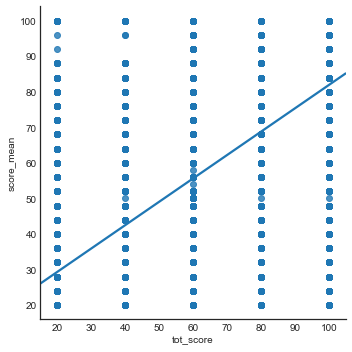

In [18]:
sns.lmplot(x="tot_score", y="score_mean", data=df_sub)

별점과 평균 score 의 차가 큰 경우 존재 

In [35]:
df_sub['score_max']=df_sub.iloc[:,1:6].max(axis=1)
df_sub['score_min']=df_sub.iloc[:,1:6].min(axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
df_sub.head()

tot_score  promotion  reward  balance  culture  manager  \
회사코드  리뷰코드                                                               
30139 1084668         80         80      80       60       60       80   
      1084223         80         60     100       80       80       80   
      1083148         80         20     100      100       80       80   
      1082388         80         60     100      100       60       60   
      1081430         60         60     100       40       60       60   

               recom_tf  score_mean  score_max  score_min  
회사코드  리뷰코드                                                 
30139 1084668         1        72.0         80         60  
      1084223         1        80.0        100         60  
      1083148         1        76.0        100         20  
      1082388         1        76.0        100         60  
      1081430         1        64.0        100         40

tot_score가 max 보다 크거나 min보다 작은 경우 삭제 

In [37]:
df_sub=df_sub.drop(df_sub[(df_sub['tot_score']>df_sub['score_max'])].index)

In [38]:
df_sub=df_sub.drop(df_sub[(df_sub['tot_score']<df_sub['score_min'])].index)

In [39]:
print("클렌징 후 총 데이터 건수 :", df_sub.shape[0])

클렌징 후 총 데이터 건수 : 536004


### 2. 별점평가 예측 (Linear Regression)

- correlation check

In [42]:
corr = df_sub.iloc[:, 1:6].corr()
corr

,promotion,reward,balance,culture,manager
promotion,1.000000,0.510235,0.326472,0.483283,0.537943
reward,0.510235,1.000000,0.414221,0.464782,0.544868
balance,0.326472,0.414221,1.000000,0.544970,0.468769
culture,0.483283,0.464782,0.544970,1.000000,0.628212
manager,0.537943,0.544868,0.468769,0.628212,1.000000


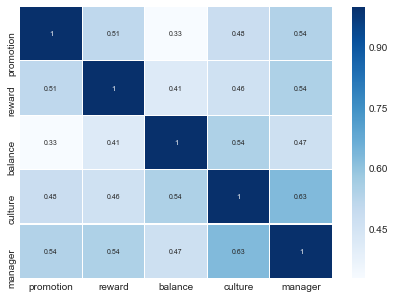

In [43]:
sns.heatmap(corr,annot=True,cmap='Blues', linewidths=0.2, annot_kws={'size':7}) 
fig=plt.gcf()
fig.set_size_inches(7,5)
plt.show()

- 전체 데이터 이용한 경우에도, 경영진과 사내문화 상관관계 높게 나타남

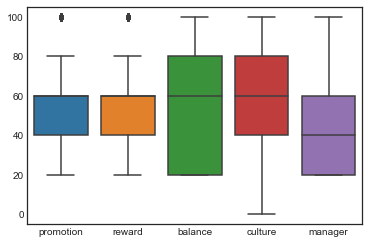

In [44]:
sns.boxplot(data = df_sub.iloc[:,1:6])

- train/test split 

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x = df_sub.iloc[:,1:6]
y = df_sub.iloc[:,0]

In [47]:
x.head()

promotion  reward  balance  culture  manager
회사코드  리뷰코드                                                 
30139 1084668         80      80       60       60       80
      1084223         60     100       80       80       80
      1083148         20     100      100       80       80
      1082388         60     100      100       60       60
      1081430         60     100       40       60       60

In [48]:
y.head()

회사코드   리뷰코드   
30139  1084668    80
       1084223    80
       1083148    80
       1082388    80
       1081430    60
Name: tot_score, dtype: int64

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7, test_size = 0.3)

#### 2-1. linear regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
lr.coef_

array([0.1968521 , 0.25659748, 0.1678398 , 0.20343889, 0.24218915])

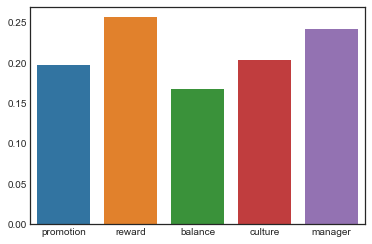

In [55]:
sns.barplot(x=x_train.columns, y=lr.coef_)

In [56]:
lr.score(x_test, y_test)

0.7493102994897619

In [57]:
y_pred_lr = lr.predict(x_test)

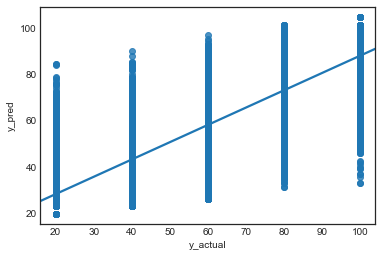

In [58]:
x, y = pd.Series(y_test, name="y_actual"), pd.Series(y_pred_lr, name="y_pred")
sns.regplot(x=x, y=y)

### 2-2. Radomforest resgression

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf = RandomForestRegressor(n_estimators = 100, max_features = None, oob_score = True
                           , min_samples_split = 10, random_state = 7)

In [61]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=7, verbose=0, warm_start=False)

In [62]:
rf.feature_importances_

array([0.04411788, 0.16744301, 0.04184163, 0.19028117, 0.55631631])

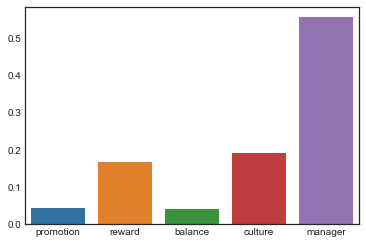

In [63]:
sns.barplot(x=x_train.columns, y=rf.feature_importances_)

경영진 너무 높게 나오는데 hyperparmeter 문제인지 모르겠음 .. <br>
중요도 순서는 lr과 유사

In [64]:
rf.score(x_test, y_test)

0.7554127983000756

In [65]:
y_pred_rf = rf.predict(x_test)

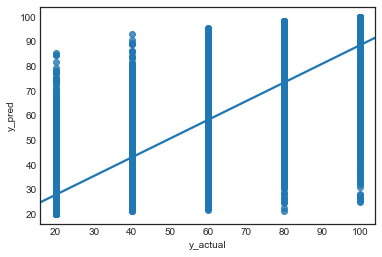

In [66]:
x, y = pd.Series(y_test, name="y_actual"), pd.Series(y_pred_rf, name="y_pred")
sns.regplot(x=x, y=y)

## 3. 추천여부 예측 (Classification)

과장님이 적용하신 이상치 제거 방법을 그대로 유지함 

In [68]:
df_clf = df_sub.copy()

In [74]:
df_clf.head()

tot_score  promotion  reward  balance  culture  manager  \
회사코드  리뷰코드                                                               
30139 1084668         80         80      80       60       60       80   
      1084223         80         60     100       80       80       80   
      1083148         80         20     100      100       80       80   
      1082388         80         60     100      100       60       60   
      1081430         60         60     100       40       60       60   

               recom_tf  score_mean  score_max  score_min  
회사코드  리뷰코드                                                 
30139 1084668         1        72.0         80         60  
      1084223         1        80.0        100         60  
      1083148         1        76.0        100         20  
      1082388         1        76.0        100         60  
      1081430         1        64.0        100         40

In [70]:
# 총 별점평가가 최하점(20점)이면서 추천여부가 1(추천함)인 경우는 abnormal한 케이스로 보고 삭제 
df_clf=df_clf.drop(df_clf[(df_sub['tot_score']<=20)&(df_clf['recom_tf']==1)].index)

In [71]:
# 총 별점평가가 최고점(100점)이면서 추천여부를 0(추천안함)인 경우도 abnormal한 케이스로 보고 삭제 
df_clf=df_clf.drop(df_clf[(df_clf['tot_score']>=100)&(df_clf['recom_tf']==0)].index)

In [72]:
df_clf['score_mean']=df_clf.iloc[:,1:6].mean(axis=1)

In [76]:
print("클렌징 후 총 데이터 건수 :",df_clf.shape[0])

클렌징 후 총 데이터 건수 : 533484


In [79]:
x2 = df_clf.iloc[:,1:6]
y2 = df_clf.iloc[:,6]

In [80]:
x2.head()

promotion  reward  balance  culture  manager
회사코드  리뷰코드                                                 
30139 1084668         80      80       60       60       80
      1084223         60     100       80       80       80
      1083148         20     100      100       80       80
      1082388         60     100      100       60       60
      1081430         60     100       40       60       60

In [81]:
y2.head()

회사코드   리뷰코드   
30139  1084668    1
       1084223    1
       1083148    1
       1082388    1
       1081430    1
Name: recom_tf, dtype: int64

In [82]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state=7, test_size = 0.3)

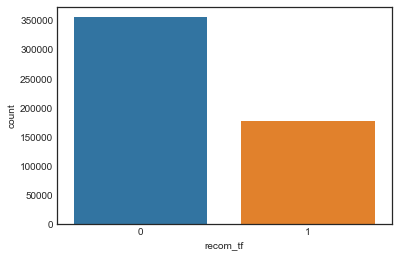

In [83]:
sns.countplot(x='recom_tf', data=df_clf)
plt.show()

2:1 정도로 unbalanced 됨  

### 3-0. baseline accuracy

In [84]:
from sklearn.dummy import DummyClassifier

In [85]:
du = DummyClassifier(strategy='most_frequent', constant=None) 
du.fit(x_train2, y_train2)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [86]:
predicted_du = du.predict(x_test2)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, predicted_du))

             precision    recall  f1-score   support

          0       0.67      1.00      0.80    106653
          1       0.00      0.00      0.00     53393

avg / total       0.44      0.67      0.53    160046



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


unblanced dataset으로 전부 0으로 예측할 경우에도 f1-score 0.53 수준  <br>
<br>
단순 accuracy 이외에 
평가 지표 필요 <br>

- kappa : 우연히 예측해서 맞을 확률을 배제했을 때, 모델이 개선된 정도 
- roc cureve : recall과 specificity 고려 -> FP를 줄이면서 TP를 높이는 모델을 우수하게 평가 
- prc curve : precsion과 recall만 고려 -> 의 영향도는 무시하면서 TP를 높이는 모델을 우수하게 평가 
- auprc : prc curve 아래의 넓이 (area under precsion-recall curve)

이상거래 탐지와 같은 higly unbalanced dataset 에서 이상거래를 찾는게 초점인 경우에 auprc 적정하나 <br>
이 경우에도 적정한지는 고민 필요 <br>
추천 기업(우수 기업)을 찾아내서 신용 평가 시 가산점을 주는 목적이라면 의미있을 듯 

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve,recall_score, f1_score, cohen_kappa_score,auc, precision_score, roc_curve, roc_auc_score

In [98]:
# 성능평가 함수 정의 
def model_evaluation(model) : 
    
    model.fit(x_train2, y_train2)
    y_pred2 = model.predict(x_test2)
    y_scores2 = model.predict_proba(x_test2)[:,1]
    
    print("confusion matrix :")
    print(confusion_matrix(y_test2, y_pred2))
    print("")
    print("score :", model.score(x_test2,y_test2))
    print("")
    
    print(classification_report(y_test2, y_pred2, digits=4))
    print("")
    
    fpr_logistic, tpr_logistic, thresholds = roc_curve(y_test2, y_scores2)
    print("auc :", roc_auc_score(y_test2, y_scores2))
          
    plt.figure(figsize=(2,2))
    plt.plot(fpr_logistic, tpr_logistic)
    
    print("kappa :", cohen_kappa_score(y_test2, y_pred2))
    
    precision, recall, thresholds = precision_recall_curve(y_test2, y_pred2, pos_label=1)
    print("auprc :", auc(recall, precision, reorder=True)) 
    
    plt.figure(figsize=(2,2))
    plt.plot(recall, precision)

### 3-1. Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lr = LogisticRegression(class_weight='balanced', random_state=7)

confusion matrix :
[[86776 19877]
 [ 8375 45018]]

score : 0.8234757507216676

             precision    recall  f1-score   support

          0     0.9120    0.8136    0.8600    106653
          1     0.6937    0.8431    0.7612     53393

avg / total     0.8392    0.8235    0.8270    160046


auc : 0.9123649348018186
kappa : 0.6232499751168669
auprc : 0.794589077002764


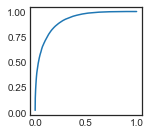

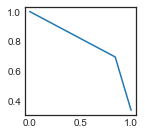

In [99]:
model_evaluation(lr)

In [100]:
lr.coef_

array([[0.02210949, 0.03852436, 0.02558619, 0.0257818 , 0.03512333]])

### 3-2. RandomForest 

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, max_features=None, class_weight='balanced', random_state=7) 

confusion matrix :
[[86333 20320]
 [ 8218 45175]]

score : 0.8216887644802119

             precision    recall  f1-score   support

          0     0.9131    0.8095    0.8582    106653
          1     0.6897    0.8461    0.7600     53393

avg / total     0.8386    0.8217    0.8254    160046


auc : 0.9117629304510874
kappa : 0.6204466799410953
auprc : 0.7935898696151646


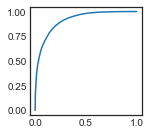

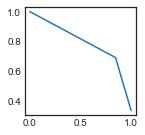

In [103]:
model_evaluation(rf)

In [101]:
rf.feature_importances_

array([0.03064882, 0.18565897, 0.05985123, 0.09955734, 0.62428364])